<a href="https://colab.research.google.com/github/cibelerusso/VED/blob/main/Comandos%20em%20Python/Associacaodevariaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Associação de variáveis

por Cibele Russo - ICMC USP

## Associação entre variáveis qualitativas e quantitativas

- Boxplots
- Gráficos de violino

## Associação entre variáveis qualitativas:

- Tabelas de dupla entrada
- Gráficos de barras
- Gráficos de mosaico
- Teste qui-quadrado.




## Associação entre variáveis quantitativas

- Gráfico de dispersão
- Covariância
- Correlação






## Aplicação com visualização e exploração de dados

Considere uma amostra dos dados de 100 mil clientes de um banco no arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.


Desenvolva a exploração e visualização dos dados. Verifique possíveis associações entre variáveis.

In [ ]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

%matplotlib inline

# Modifique o diretório para fazer a leitura dos dados em dados_banco.csv

url = 'https://raw.githubusercontent.com/cibelerusso/VED/refs/heads/main/Dados/amostra_banco.csv'

# Dados banco - Leitura dos dados
dados = pd.read_csv(url, index_col=0)

dados

Cliente Sexo  Idade  Empresa  Salario  Saldo_cc  Saldo_poupança  \
33227    33227    M     38  Privada     6467    993.18            0.00   
64805    64805    M     33  Privada     5764   1167.27            0.00   
39764    39764    F     35  Privada     5417    667.30            0.00   
51271    51271    M     36  Privada     5858    846.53            0.00   
9699      9699    M     32  Privada     5579    768.90        16801.57   
...        ...  ...    ...      ...      ...       ...             ...   
21466    21466    F     31  Privada     5607   1006.92            0.00   
23128    23128    M     32  Privada     5534   1154.64            0.00   
67012    67012    M     36  Privada     6141    835.19            0.00   
5247      5247    M     34  Privada     5614   1027.08            0.00   
61319    61319    M     37  Privada     5887    985.49            0.00   

       Saldo_investimento  Devedor_cartao  Inadimplente  
33227                0.00         2038.32             1  
64805                0.00         4617.05             1  
39764                0.00         5726.83             1  
51271                0.00         1723.74             1  
9699              8138.71            0.00             0  
...                   ...             ...           ...  
21466                0.00         1976.27             1  
23128                0.00         4553.96             0  
67012                0.00         3865.27             0  
5247                 0.00         4580.22             1  
61319                0.00         2102.73             1  

[500 rows x 10 columns]

In [ ]:
dados.head()

Cliente Sexo  Idade  Empresa  Salario  Saldo_cc  Saldo_poupança  \
33227    33227    M     38  Privada     6467    993.18            0.00   
64805    64805    M     33  Privada     5764   1167.27            0.00   
39764    39764    F     35  Privada     5417    667.30            0.00   
51271    51271    M     36  Privada     5858    846.53            0.00   
9699      9699    M     32  Privada     5579    768.90        16801.57   

       Saldo_investimento  Devedor_cartao  Inadimplente  
33227                0.00         2038.32             1  
64805                0.00         4617.05             1  
39764                0.00         5726.83             1  
51271                0.00         1723.74             1  
9699              8138.71            0.00             0

### Classificação das variáveis por tipo

- Sexo: qualitativa nominal
- Idade: quantitativa contínua
- Empresa: qualitativa nominal
- Salário: quantitativa contínua
- Saldo_cc: quantitativa contínua
- Saldo_poupança: quantitativa contínua
- Saldo_investimento: quantitativa contínua
- Devedor_cartão: quantitativa contínua
- Inadimplente: qualitativa nominal (embora numérica)

### Cálculo da média por grupos

In [ ]:
# Média de idade por grupos

dados.groupby('Sexo')['Idade'].mean()

Sexo
F    30.345794
M    33.202797
Name: Idade, dtype: float64

In [ ]:
# Média de idade por grupos

dados.groupby('Empresa')['Idade'].mean()

Empresa
Autônomo    29.385714
Privada     32.980831
Pública     30.854701
Name: Idade, dtype: float64

In [ ]:
# Desvio-padrão de idade por grupos

dados.groupby('Sexo')['Idade'].std()

Sexo
F    2.798735
M    2.803655
Name: Idade, dtype: float64

In [ ]:
# Média de salário por grupos

dados.groupby('Sexo')['Salario'].mean()

Sexo
F    5276.313084
M    5726.695804
Name: Salario, dtype: float64

### Associação entre duas variáveis qualitativas

In [ ]:
# Tabela de dupla entrada

tabela_dupla = pd.crosstab(index=dados['Empresa'], columns=dados['Sexo'])

tabela_dupla

Sexo        F    M
Empresa           
Autônomo   44   26
Privada   110  203
Pública    60   57

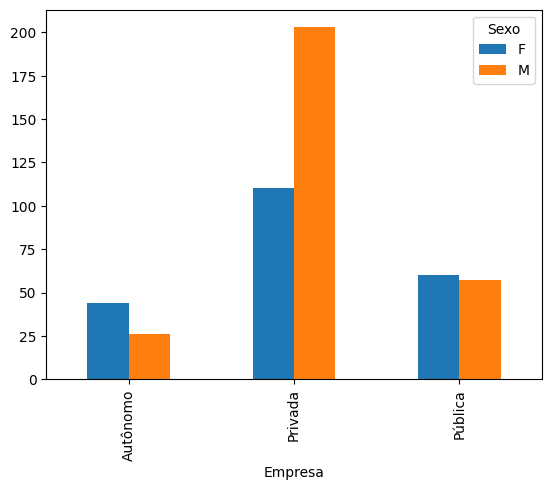

In [ ]:
tabela_dupla.plot.bar()

plt.legend(title='Sexo')

plt.show()

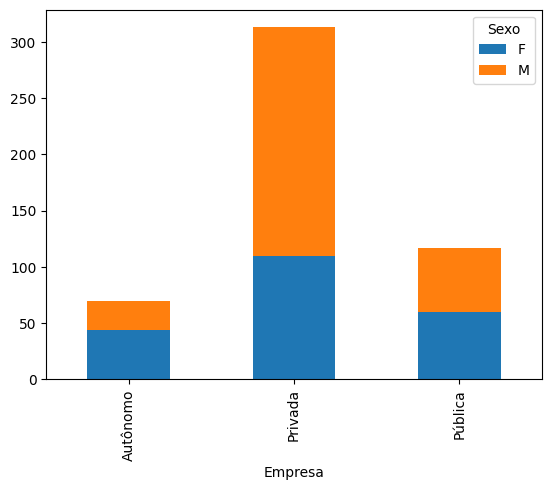

In [ ]:
tabela_dupla.plot.bar(stacked=True)

plt.legend(title='Sexo')

plt.show()

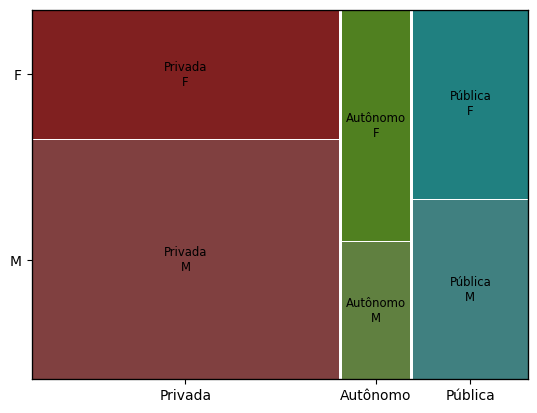

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(dados, ['Empresa','Sexo']);

In [ ]:
tabela_dupla

Sexo        F    M
Empresa           
Autônomo   44   26
Privada   110  203
Pública    60   57

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(tabela_dupla)

Chi2ContingencyResult(statistic=np.float64(22.4353007615101), pvalue=np.float64(1.3434958823692781e-05), dof=2, expected_freq=array([[ 29.96 ,  40.04 ],
       [133.964, 179.036],
       [ 50.076,  66.924]]))

### Associação entre variáveis quantitativas e qualitativas

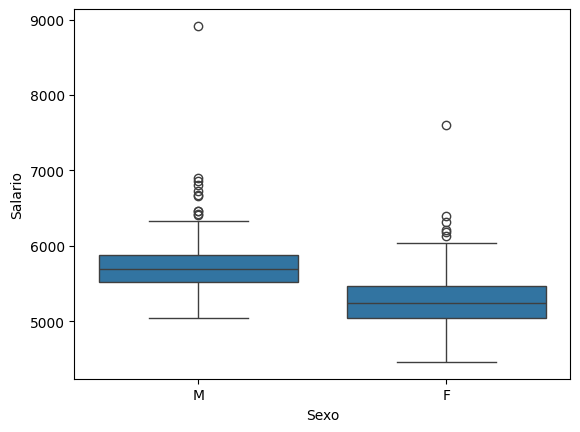

In [ ]:
ax = sns.boxplot(x='Sexo', y='Salario', data=dados)

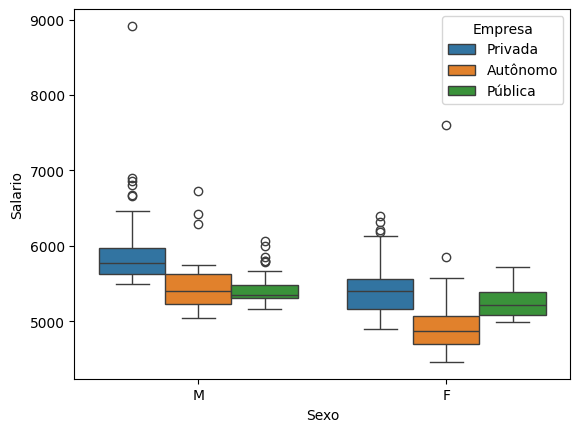

In [ ]:
ax = sns.boxplot(x='Sexo', y='Salario', hue='Empresa', data=dados)

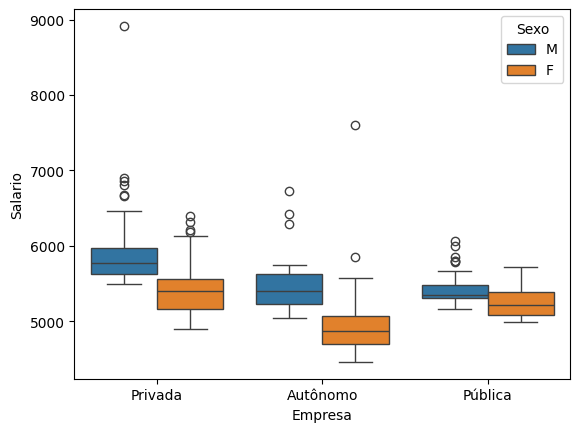

In [ ]:
ax = sns.boxplot(x='Empresa', y='Salario', hue='Sexo', data=dados)

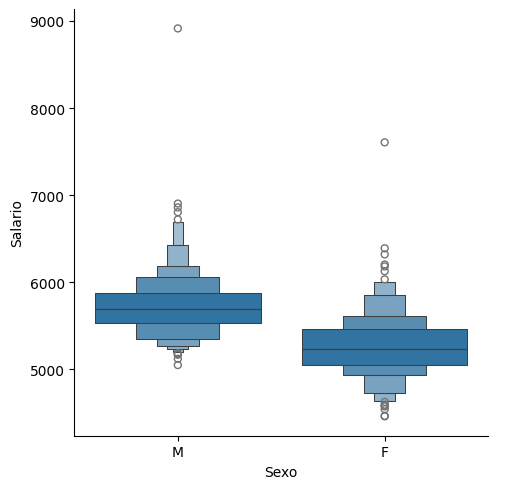

In [ ]:
ax = sns.catplot(x='Sexo', y='Salario', kind='boxen', data=dados)

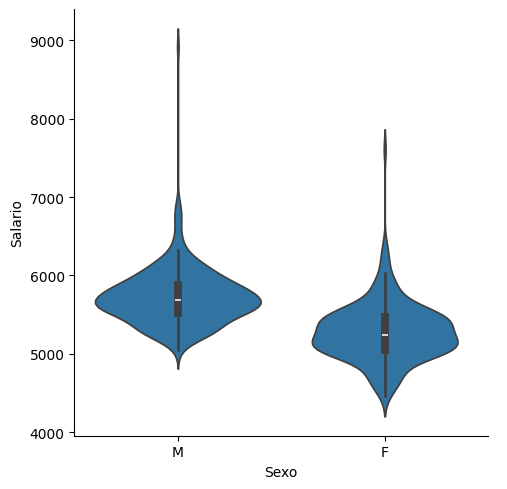

In [ ]:
ax = sns.catplot(x='Sexo', y='Salario', kind='violin', data=dados)

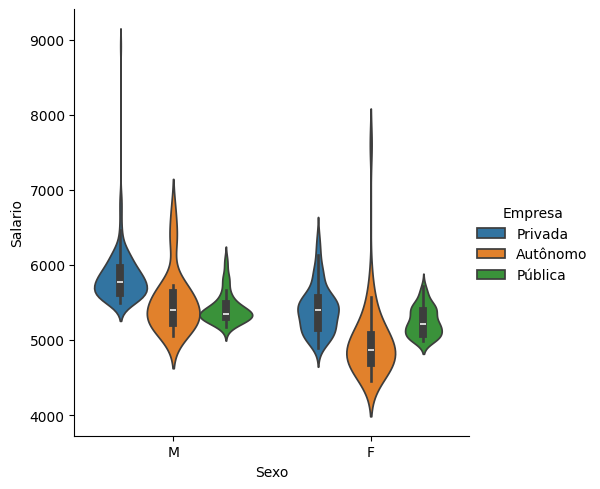

In [ ]:
ax = sns.catplot(x='Sexo', y='Salario', hue='Empresa', kind='violin', data=dados)

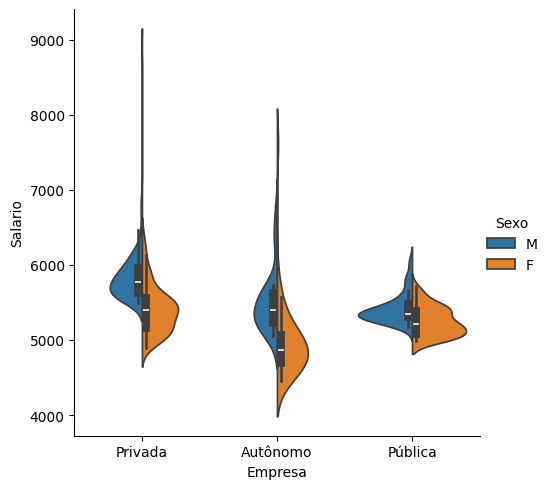

In [ ]:
sns.catplot(x='Empresa', y='Salario', hue='Sexo', kind='violin', split=True, data=dados)

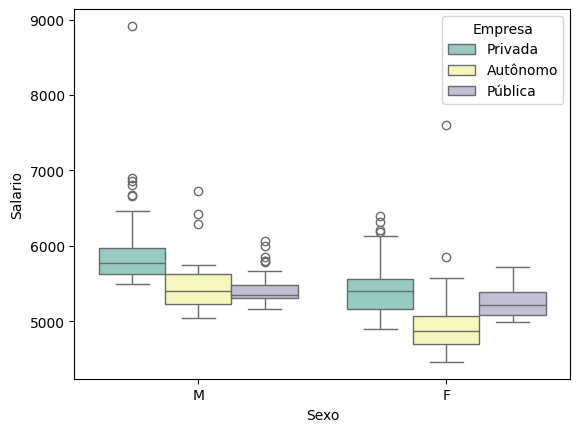

In [ ]:
ax = sns.boxplot(x="Sexo", y="Salario", hue="Empresa",

                 data=dados, palette="Set3")

Text(0, 0.5, 'Salário')

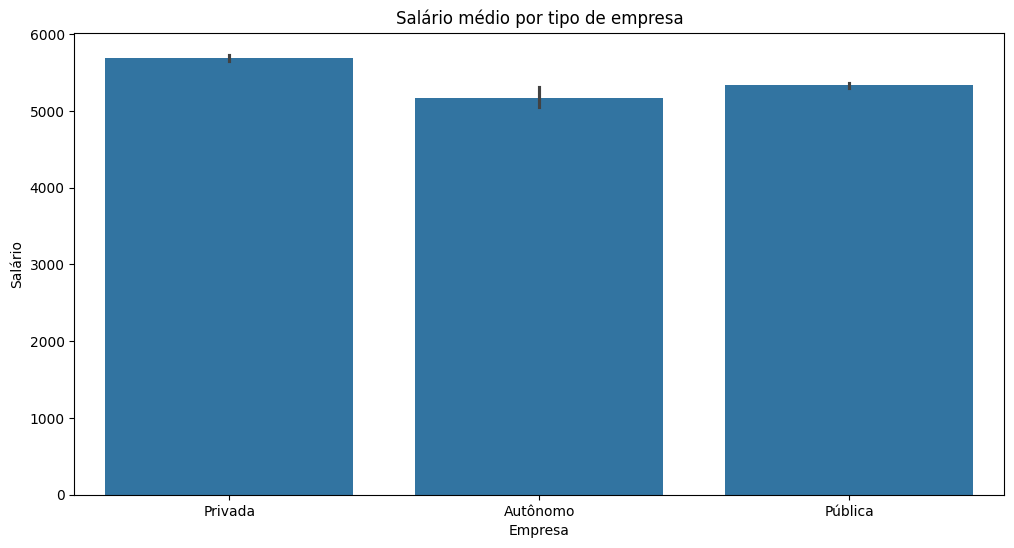

In [ ]:
# Salário médio por tipo de empresa


# Estabelecendo o tamanho do gráfico
plt.figure(figsize=(12,6))

# Título
plt.title("Salário médio por tipo de empresa")

# Gráfico de barras com salário médio por tipo de empresa
sns.barplot(x=dados['Empresa'], y=dados['Salario'])

# Label para eixo vertical
plt.ylabel("Salário")



## Associação entre variáveis quantitativas

**Gráfico de dispersão**

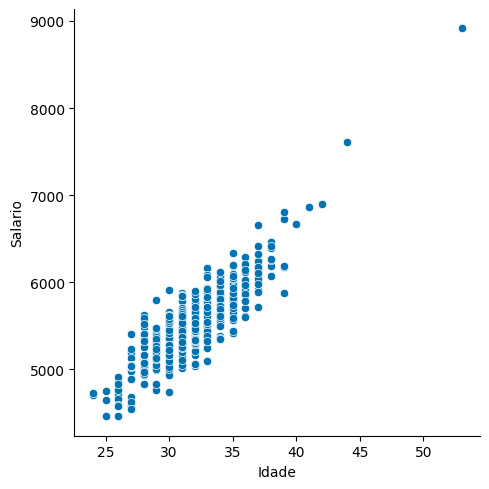

In [ ]:
sns.set_palette('colorblind')
sns.relplot(x='Idade', y='Salario', data=dados)

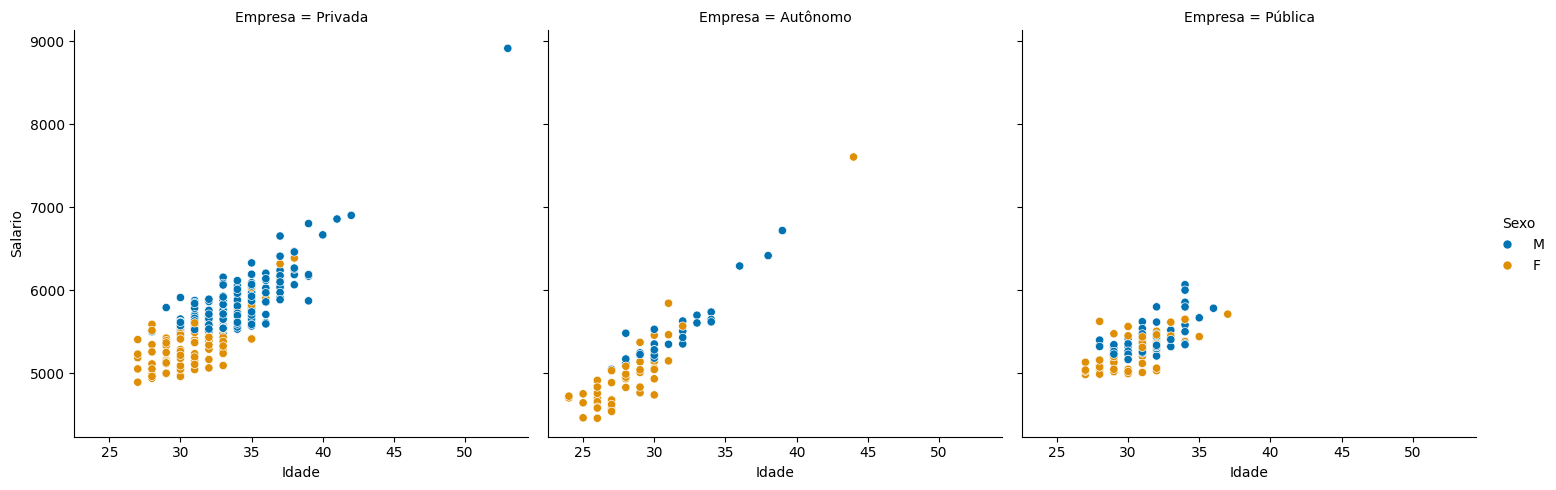

In [ ]:
sns.set_palette('colorblind')
sns.relplot(x='Idade', y='Salario', hue='Sexo', col='Empresa',  data=dados)

**Gráficos com Regressão**

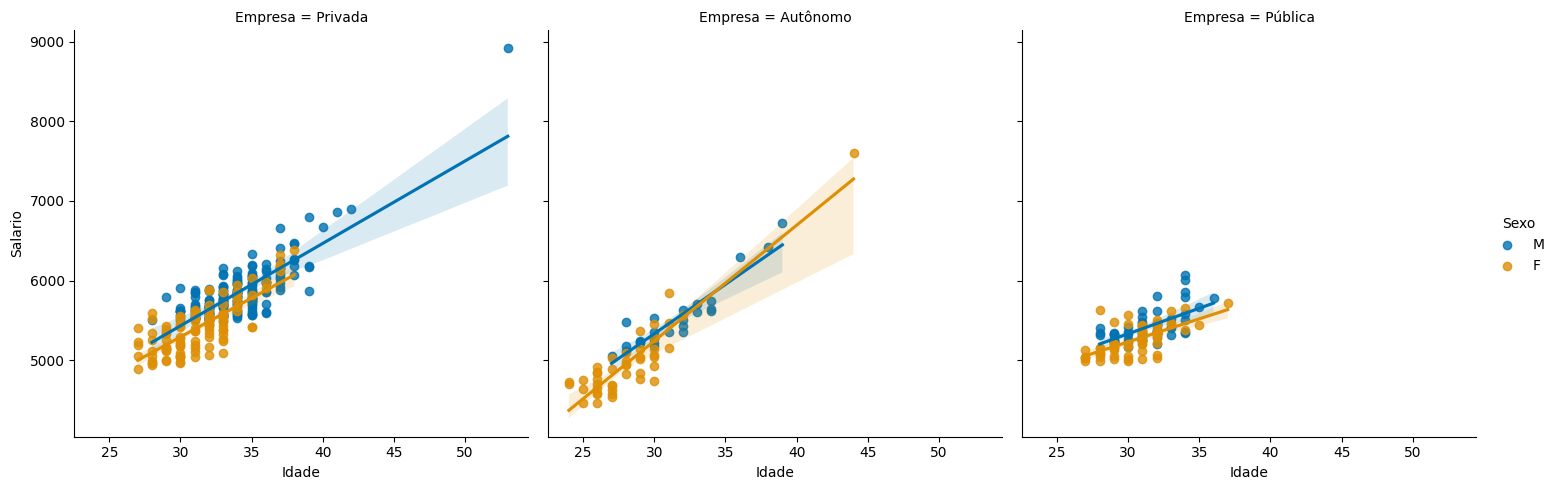

In [ ]:
sns.lmplot(x='Idade', y='Salario', hue='Sexo', col='Empresa',  data=dados)

**Joint plot**

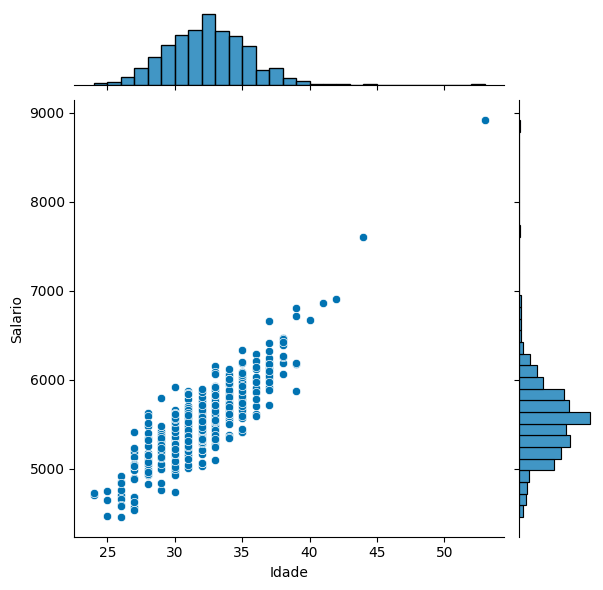

In [ ]:
sns.jointplot(x='Idade', y='Salario',   data=dados)

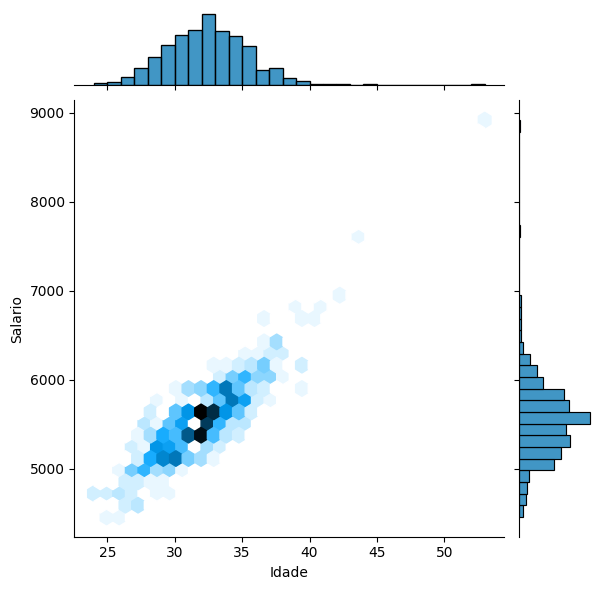

In [ ]:
sns.jointplot(x='Idade', y='Salario', kind='hex',  data=dados)

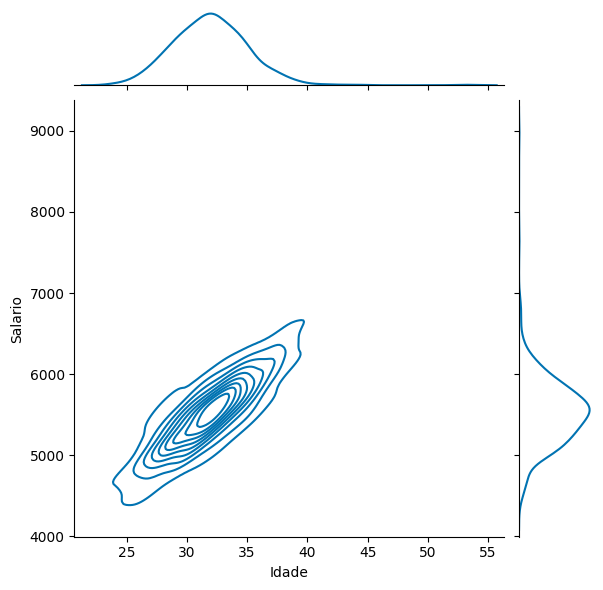

In [ ]:
sns.jointplot(x='Idade', y='Salario', kind='kde',  data=dados)

**Coeficiente de correlação de Pearson**

In [ ]:
from scipy.stats import pearsonr

pearsonr(dados['Idade'], dados['Salario'])

PearsonRResult(statistic=np.float64(0.8711363192594737), pvalue=np.float64(6.158853760188667e-156))

### Gráficos multivariados

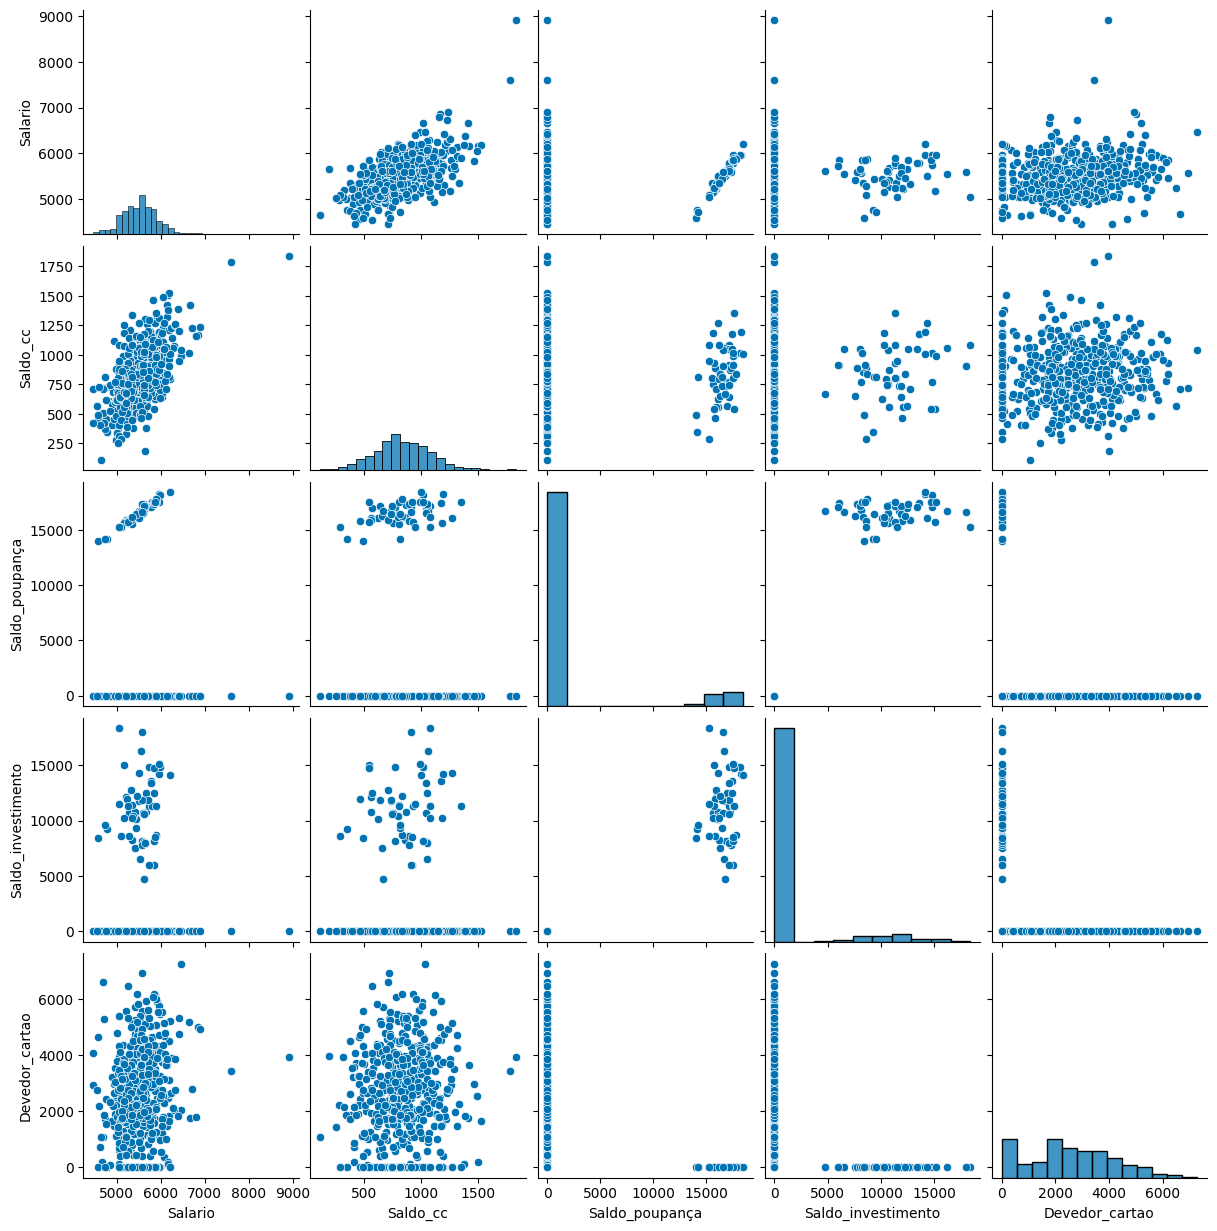

In [ ]:
sns.pairplot(dados[['Salario','Saldo_cc', 'Saldo_poupança', 'Saldo_investimento', 'Devedor_cartao']])


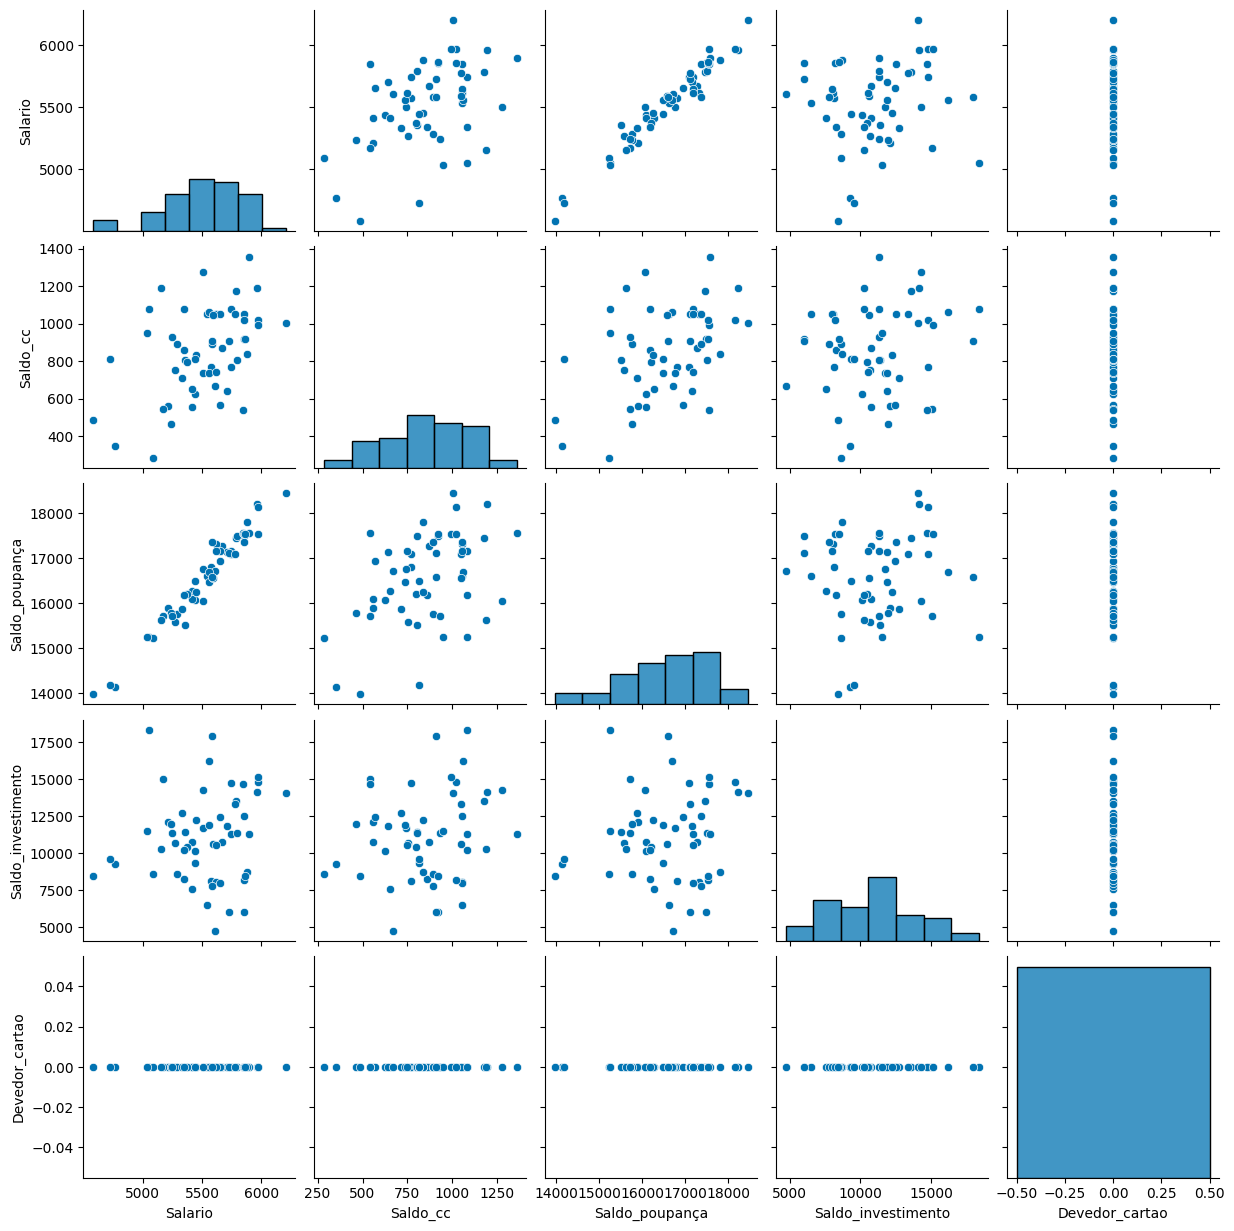

In [ ]:
dados_nozeros = dados[dados['Saldo_investimento']*dados['Saldo_poupança']!=0]
sns.pairplot(dados_nozeros[['Salario','Saldo_cc', 'Saldo_poupança', 'Saldo_investimento', 'Devedor_cartao']])


In [ ]:
dados2 = dados[['Salario','Saldo_cc','Devedor_cartao','Empresa']]

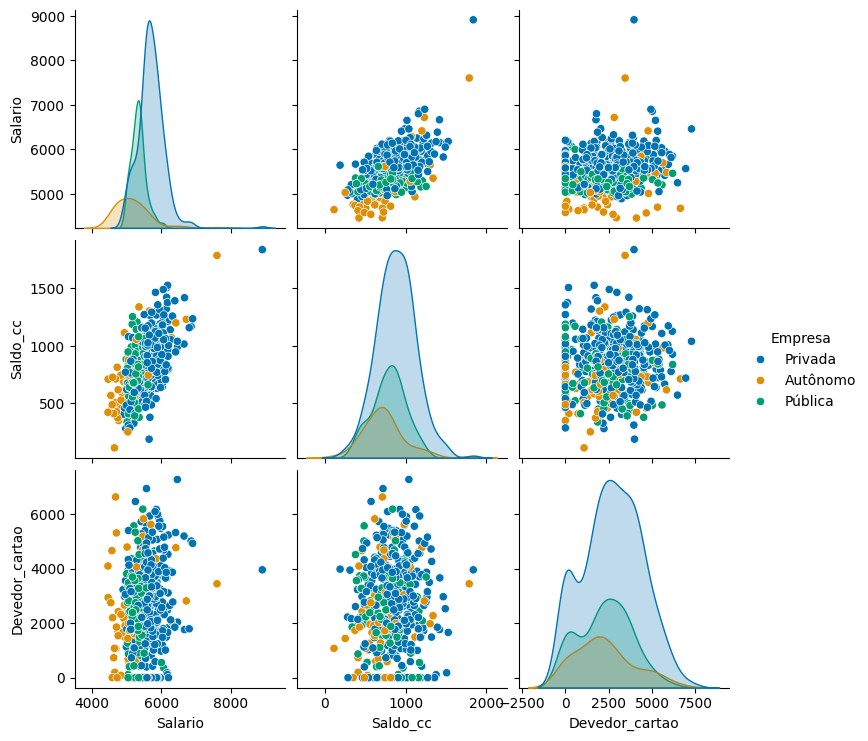

In [ ]:
sns.pairplot(dados2, hue='Empresa')

## AED de forma automatizada

**Usar somente se estritamente necessário ou como uma análise inicial!!**

Referência: https://medium.datadriveninvestor.com/10-python-automatic-eda-libraries-which-makes-data-scientist-life-easier-825d0a928570



In [ ]:
# Instale se necessário ou se for executar no Google colab
#!pip install pandas_profiling

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.9 MB 25.2 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400139 sha256=ad96dff2e8a4f8c59b74684e0f755de6c9e7b4407350fb1f3baef551ba906e26
  Stored in directory: /tmp/pip-ephem-wheel-cache-d20k0h0a/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=143209008cac52efa6bfd0a127faf5684cdafef4af65ccb2abb4dda93ab9f6fb
  Stored in dire

In [ ]:
!pip uninstall numpy

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? T
Your response ('t') was not one of the expected responses: y, n, 
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 53.0 MB/s eta 0:00:00


### Atenção: Você deve reiniciar o kernel. No google colab, pode ir em Ambiente de Execução -> Reiniciar sessão

In [ ]:
import ydata_profiling

In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Estatistica-Ciencia-Dados/main/Data/dados_banco.csv', index_col=0, sep=',')
pandas_profiling.ProfileReport(dados)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 24.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dados.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 23.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Exercício**

Analise as possíveis associações entre o sexo, idade, empresa, salário, saldo em conta corrente, saldo em conta poupança, saldo em investimento e devedor no cartão com a variável Inadimplente.